# PySHP - A reader much faster than geopandas?

Without assuming that all our data is wrapped in pandas and geopandas, we can be a bit faster and more explicit about what to do. We want to only remember center points of building polygons, hence, we can loop (in general, slow) over polygons and compute the centroid using numpy. This works on the business laptop with a speed of about 3 minutes for upper bavaria doing some 13000 polygons per second. This is not fast, but doable for geoscientists. Still, the C++ equivalent of 4 seconds is an order of magnitude faster...

In [3]:
#%pip install pyshp

In [1]:
import shapefile
import numpy as np
from tqdm.notebook import tqdm
shp = shapefile.Reader("Oberbayern/Oberbayern-hausumringe.shp") 
print(shp)

shapefile Reader
    2658867 shapes (type 'POLYGON')
    2658867 records (2 fields)


In [2]:
# read all - not fast, but at least doable.
centroids = np.zeros(len(shp)*2).reshape(-1,2)
print(len(shp))
for i in tqdm(range(len(shp))):
    p = np.array([[x,y] for x,y in shp.shape(i).points])
    centroids[i,:] = np.mean(p, axis=0)

2658867


  0%|          | 0/2658867 [00:00<?, ?it/s]

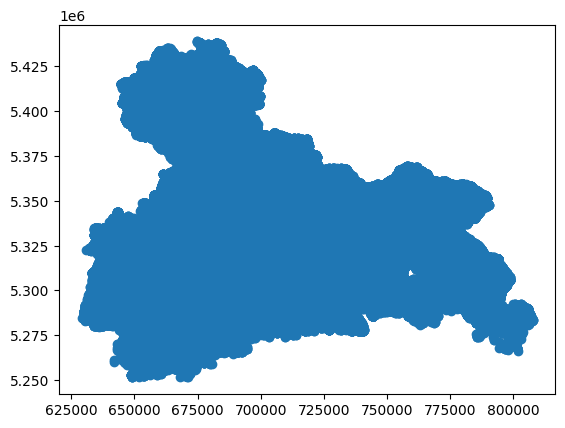

In [3]:
from matplotlib import pyplot as plt
plt.scatter(centroids[:,0],centroids[:,1])
plt.show()

# Homework

Now, you have all center points and all polygons of around Munich. Go through the polygons (they are fewer) and 
intersect them with all buildings. This will be slow, but for a Bachelor thesis or Master thesis, this half a day would be okay


# Polygon Quality and Cleaning up a Single one

2658867
(6, 2)


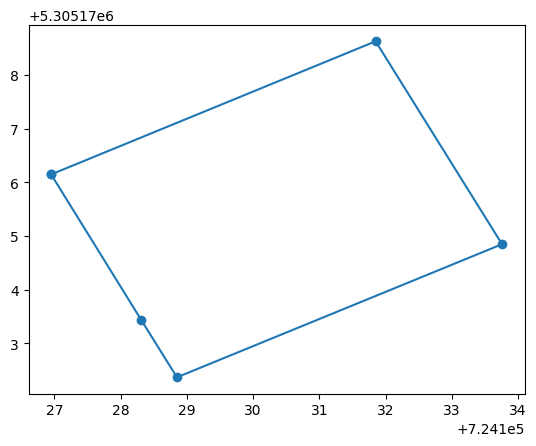

In [19]:
print(len(shp))
P = np.array(shp.shape(0).points)
print(P.shape)
plt.plot(P[:,0],P[:,1])
plt.scatter(P[:,0],P[:,1])
plt.show()

In [18]:
print(P)

[[ 724126.95 5305176.15]
 [ 724131.85 5305178.63]
 [ 724133.76 5305174.85]
 [ 724128.85 5305172.37]
 [ 724128.31 5305173.44]
 [ 724126.95 5305176.15]]


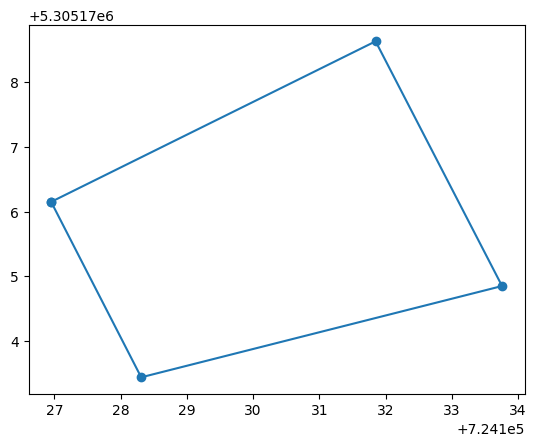

In [27]:
test = P[[True,True,True,False,True,True],:]
plt.plot(test[:,0],test[:,1])
plt.scatter(test[:,0],test[:,1])
plt.show()